## Pets of Seattle
###### Part 1: Data Cleaning and EDA
Did you know dogs were the first domesticated animial? I loved reading that in the book [Sapiens by Yuval Noah Harari](https://www.ynharari.com/book/sapiens/) because it validated my deep love of animals, especially dogs, as they were our first four legged companions! I wanted to take a look at pet ownership in the US and Seattle releases their records annually. This notebook explores the pets of the Northwest!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pet = pd.read_csv('./data/Seattle_Pet_Licenses.csv')

In [3]:
pet.head(2)

,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
0,January 03 2000,263574,NaN,Dog,Shepherd,NaN,98119
1,January 05 2000,119820,Fancy,Dog,"Retriever, Labrador",NaN,98106


In [4]:
pet.shape

(49230, 7)

#### Data Cleaning

In [5]:
pet.isna().sum()

License Issue Date        0
License Number            0
Animal's Name           289
Species                   0
Primary Breed             0
Secondary Breed       25974
ZIP Code               1214
dtype: int64

Since secondary breed is missing almost half of the values, that column will be dropped. Additionally, knowing the zip code isn't a point of interest for this dashboard so I'll drop that one as well. For animal's name, there are almost 300 missing values. This is definitely a column of interest that I want to keep so I'll just drop those observations. Given the size of the dataset, losing 300 rows is not a concern.

In [6]:
pet.drop(columns = ['Secondary Breed', 'ZIP Code'], inplace = True)

In [7]:
pet = pet[pet['Animal\'s Name'].notnull()]

In [8]:
new_columns = {'License Issue Date' : 'issued',
               'License Number' : 'number', 
               'Animal\'s Name' :  'name',
               'Species' : 'species',
              'Primary Breed' : 'breed'}

In [9]:
pet.rename(columns = new_columns, inplace = True)

In [10]:
pet.head(2)

,issued,number,name,species,breed
1,January 05 2000,119820,Fancy,Dog,"Retriever, Labrador"
2,January 06 2000,10401,Skip,Dog,Siberian Husky


In [11]:
pet.isna().sum()

issued     0
number     0
name       0
species    0
breed      0
dtype: int64

In [12]:
pet.to_csv('./data/clean_pet_data.csv', index = False)

#### Exploratory Data Analysis

In [13]:
pet['species'].value_counts()

Dog     33078
Cat     15824
Goat       36
Pig         3
Name: species, dtype: int64

Text(0.5, 1.0, 'Types of Pets')

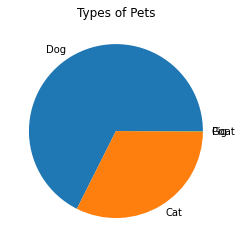

In [14]:
plt.pie(pet['species'].value_counts(normalize = True), labels = ['Dog', 'Cat', 'Goat', 'Pig']);
plt.title('Types of Pets')

Text(0.5, 1.0, 'Top 10 Dog Names')

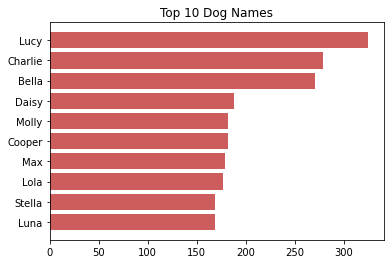

In [15]:
x_dog = list(pet[pet['species'] == 'Dog'].groupby('name').count().sort_values('species', ascending = False)[:10].index)
y_dog = list(pet[pet['species'] == 'Dog']['name'].value_counts().sort_values(ascending = False)[:10])
x_dog = list(reversed(x_dog))
y_dog = list(reversed(y_dog))
plt.barh(x_dog, y_dog, color = 'indianred')
plt.title('Top 10 Dog Names')



Text(0.5, 1.0, 'Top 10 Cat Names')

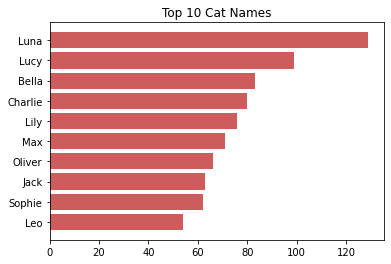

In [16]:
x_cat = list(pet[pet['species'] == 'Cat'].groupby('name').count().sort_values('species', ascending = False)[:10].index)
y_cat = list(pet[pet['species'] == 'Cat']['name'].value_counts().sort_values(ascending = False)[:10])
x_cat = list(reversed(x_cat))
y_cat = list(reversed(y_cat))
plt.barh(x_cat, y_cat, color = 'indianred')
plt.title('Top 10 Cat Names')

I'd also like to look at the different breeds of animals, but the way they're packaged now won't work. I'll need to split out each breed to it's own column.

In [17]:
pet['breed'] = [x.split(',') for x in pet['breed']]

In [18]:
def remove_space(list_of_breeds):
    list_of_breeds = [i.strip() for i in list_of_breeds]
    return list_of_breeds

In [19]:
pet['breed'] = pet['breed'].apply(remove_space)

Separating the dog breeds:

In [20]:
dog = pet[pet['species'] == 'Dog']

In [21]:
dog.reset_index(inplace = True)

In [22]:
all_breed = []
for p in dog['breed']:
    for b in p:
        if b.strip() in all_breed:
            pass
        else:
            all_breed.append(b.strip())

In [23]:
print(len(all_breed), len(set(all_breed)))

270 270


270 is a lot of dog breeds to add to the DataFrame but overall I think it's worth it to see what the most populat breed is!

In [24]:
for breed in all_breed:
    dog[breed] = 0
    for p in range(0, len(dog['breed'])):
        if breed in dog.loc[p, 'breed']:
            dog.loc[p, breed] = 1
        else:
            dog.loc[p, breed] = 0

In [25]:
dog.head()
dog.to_csv('./data/dog_breeds.csv', index = False)

Doing the same for cats:

In [26]:
cat = pet[pet['species'] == 'Cat']

In [27]:
cat

,issued,number,name,species,breed
15853,May 13 2015,361031,My Boy,Cat,[Russian Blue]
15854,July 21 2015,203480,Rocket,Cat,[Domestic Shorthair]
15855,November 17 2015,75175,Charlie,Cat,[Persian]
15856,November 24 2015,18541,Brat Cat,Cat,[Domestic Shorthair]
15857,December 06 2015,276770,Milo,Cat,[Maine Coon]
...,...,...,...,...,...
31858,January 01 2020,8014475,Moki,Cat,[Domestic Shorthair]
31859,January 01 2020,8014477,George Klainer,Cat,[American Shorthair]
31860,January 02 2020,8014481,Lua,Cat,[Ragdoll]
31861,January 02 2020,8014482,Ginger,Cat,[American Shorthair]


In [28]:
cat.reset_index(inplace = True)

In [29]:
all_breed_cat = []
for p in cat['breed']:
    for b in p:
        if b.strip() in all_breed_cat:
            pass
        else:
            all_breed_cat.append(b.strip())

In [30]:
print(len(all_breed_cat), len(set(all_breed_cat)))

60 60


In [31]:
for breed in all_breed_cat:
    cat[breed] = 0
    for p in range(0, len(cat['breed'])):
        if breed in cat.loc[p, 'breed']:
            cat.loc[p, breed] = 1
        else:
            cat.loc[p, breed] = 0

In [32]:
cat.to_csv('./data/cat_breeds.csv', index = False)

In [33]:
cat.head()

,index,issued,number,name,species,breed,Russian Blue,Domestic Shorthair,Persian,Maine Coon,...,Sokoke,Toyger,Desert Lynx,British Blue,Cymric,Exotic Longhair,California Spangled,Savannah,Munchkin,Oriental Long Hair
0,15853,May 13 2015,361031,My Boy,Cat,[Russian Blue],1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15854,July 21 2015,203480,Rocket,Cat,[Domestic Shorthair],0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15855,November 17 2015,75175,Charlie,Cat,[Persian],0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,15856,November 24 2015,18541,Brat Cat,Cat,[Domestic Shorthair],0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15857,December 06 2015,276770,Milo,Cat,[Maine Coon],0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
